## Observations and Insights
1.This analysis considers only the Capomulin, Ramicane, Infubinol, and Ceftamin treatments.
Capomulin was legitimately successful at treating the tumors in this population of mice. 
Ramicane also seems to be successful at its best after Capomulin.
It was the only treatment of those analyzed to actually reduce the total tumor volume over the course of treatment.
Some of the other treatments were arguably less effective than no treatment.
2.Bar charts tells us Capomulin, Ramicane are more slightly used drugs for the treatments .
3.Capomulin, Ramicane and Ceftamin seems to have no potential outliers.
4.Overall , When comparing all 4 treatments, the mice given Capomulin outperformed the other 3 treatments in every physiological response tested.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(study_results, mouse_metadata, how='left', on = 'Mouse ID')
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice in the DataFrame.
num_of_mice = study_data["Mouse ID"].unique()
print(len(num_of_mice))

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_data[study_data[['Mouse ID','Timepoint']].duplicated(keep=False)]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = study_data[study_data['Mouse ID'].isin(duplicate_mouse_ids) == False]
clean_study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = clean_study_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = clean_study_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = clean_study_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std_dev = clean_study_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
std_error = clean_study_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_stats = pd.DataFrame({'Mean': means,'Median': medians,'Variance': variance,'StdDev': std_dev,
                              'SEM': std_error
                             })
summary_stats
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,StdDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = clean_study_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']}) 
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

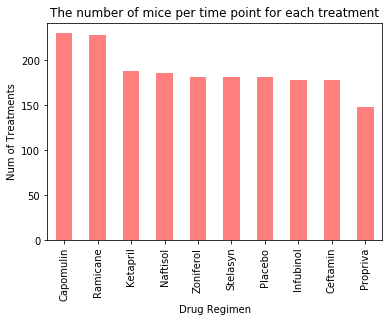

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
count = clean_study_data['Drug Regimen'].value_counts()
count.plot(kind='bar' ,color='r', alpha=0.5, align="center")
plt.xticks(rotation= 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Num of Treatments")
plt.title("The number of mice per time point for each treatment")
plt.show()


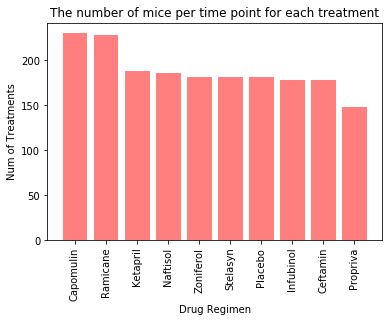

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
plt.bar(count.index, count, color='r', alpha=0.5, align="center")
plt.xticks(rotation= 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Num of Treatments")
plt.title("The number of mice per time point for each treatment")
plt.show()



## Pie Plots

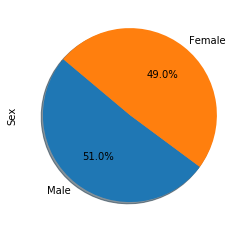

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count = clean_study_data['Sex'].value_counts()
count.plot(kind='pie',autopct="%1.1f%%", shadow=True, startangle=140);


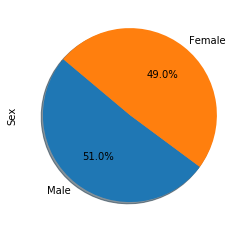

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(count,labels= count.index, autopct="%1.1f%%", shadow=True, startangle=140)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
max_tumor = clean_study_data.groupby(['Mouse ID']).max()
#reset the mouse id index
max_tumor.reset_index(inplace=True)
max_tumor_vol = max_tumor[['Mouse ID','Timepoint']].merge(clean_study_data, on=['Mouse ID','Timepoint'],how ='left')
max_tumor_vol 
drugs = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']
drug_data = {}
for col in drugs:
    drug_df = max_tumor_vol.loc[max_tumor_vol['Drug Regimen'] == col] ['Tumor Volume (mm3)']
    drug_data[col] = drug_df
    quartiles = drug_df.quantile([0.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lowerb = lowerq - (1.5*iqr)
    #print(lowerb)
    upperb = upperq + (1.5*iqr)
    #print(upperb)
    print(f"{col} potential outliers {drug_df.loc[(drug_df < lowerb) | (drug_df > upperb)]}")

Capomulin potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


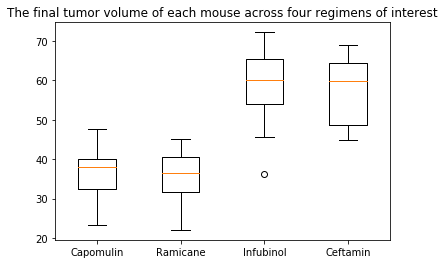

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([drug_data['Capomulin'],drug_data['Ramicane'],drug_data['Infubinol'],drug_data['Ceftamin']],labels=drugs)
plt.title("The final tumor volume of each mouse across four regimens of interest")
plt.show()

## Line and Scatter Plots

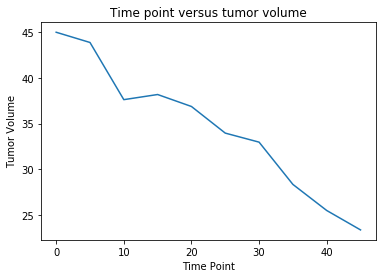

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = clean_study_data.loc[clean_study_data['Drug Regimen']== "Capomulin"]
#print(capomulin)
capomulin_mouse = capomulin.loc[capomulin['Mouse ID']== "s185"]
#print(capomulin_mouse)
plt.plot(capomulin_mouse['Timepoint'],capomulin_mouse['Tumor Volume (mm3)'])
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")
plt.title("Time point versus tumor volume")
plt.show()

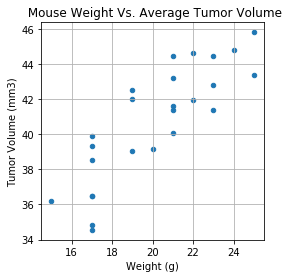

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin = clean_study_data.loc[clean_study_data['Drug Regimen']== "Capomulin"]
capomulin_avg = capomulin.groupby(['Mouse ID']).mean()
capomulin_avg.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(4,4),
              title=" Mouse Weight Vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

In [68]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = capomulin_avg['Weight (g)']
avg_tumor_volume = capomulin_avg['Tumor Volume (mm3)']
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


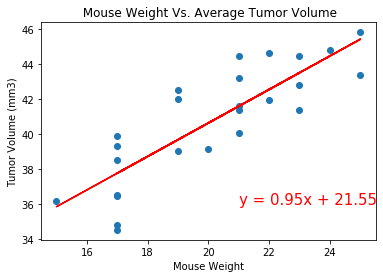

In [17]:
x_values = capomulin_avg['Weight (g)']
y_values = capomulin_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(21,36),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.title(" Mouse Weight Vs. Average Tumor Volume")
plt.show()